# Chapter 2
## question 2.4: diminishing steplength

In this exercise you will use random search and a diminishing steplength to
minimize a famous optimization test function called the Rosenbrock function

g(w0,w1) = 100(w0-w1^2)^2+(w0-1)^2

This function has a global minimum at the point w*=(1,1)

located in a very narrow and curved valley.
Make two runs of random search using P = 1000, the initial point w = (-2,-2) and 50 steps.

With the first run use a fixed steplength α = 1 and (with the
second run) a diminishing steplength as detailed in Section 0.6. Compare the
two runs by either plotting the contour plot of the cost function with each
run on top, or by constructing a cost function history plot.

In [1]:
# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

Import libraries

In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

Set constants

In [3]:
P = 1000
alpha = 1
K = 50
omega_k = (-2,-2)

Define the function g

In [4]:
def g(w):
    evaluation = 100*(w[0]-w[1]*w[1])*(w[0]-w[1]*w[1])+(w[0]-1)*(w[0]-1)
    return evaluation

<IPython.core.display.Javascript object>


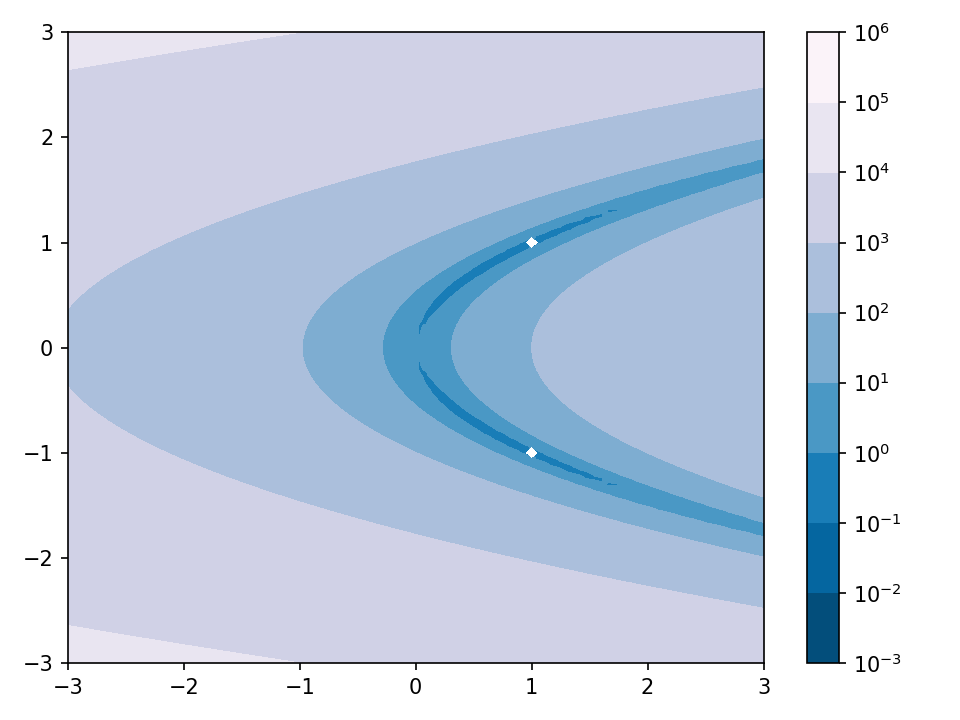

/home/jordan/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1484: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


In [5]:
N = 100
x = np.linspace(-3.0, 3.0, N)
y = np.linspace(-3.0, 3.0, N)

X, Y = np.meshgrid(x, y)
inp = (X,Y)
z = g(inp)
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
cbar = fig.colorbar(cs)
plt.show()

First run of local minima search with constant alpha

In [6]:
omega_k = (-2,-2)
value = g(omega_k)

x_list_1 = [omega_k[0]]
y_list_1 = [omega_k[1]]
z_list_1 = [value]
index_1 = [0]
all_values_1 = [value]

for i in range(K):
    for j in range(P):
        random_dir = np.random.randn(2,1)
        normalized_denom = math.sqrt(random_dir[0]**2+random_dir[1]**2)
        x_dir = (random_dir[0]/normalized_denom)**2
        y_dir = (random_dir[1]/normalized_denom)**2
        if (j==0):
            random_point = (omega_k[0]+x_dir*alpha,omega_k[1]+y_dir*alpha)
            best_point =  random_point
            random_value = g(random_point)
        else:
            random_point = (omega_k[0]+x_dir*alpha,omega_k[1]+y_dir*alpha)
            if(g(random_point)<random_value):
                random_value = g(random_point)
                best_point = random_point
                
    if(random_value<value):
        value = random_value
        omega_k = best_point
        x_list_1.append(omega_k[0])
        y_list_1.append(omega_k[1])
        z_list_1.append(value)
        print("step:"+str(i+1)+' : evaluation ='+str(value[0]))
    else:
        print("step:"+str(i+1)+' : evaluation ='+str(value[0]))
        break
    all_values_1.append(value)
    index_1.append(i+1)

step:1 : evaluation =909.0001557065999
step:2 : evaluation =312.48219447925396
step:3 : evaluation =58.48633272101393
step:4 : evaluation =0.9899135107325302
step:5 : evaluation =0.38138486707514097
step:6 : evaluation =0.0006729910641999529
step:7 : evaluation =0.0006729910641999529


Plotting the descent on the contour map

<IPython.core.display.Javascript object>


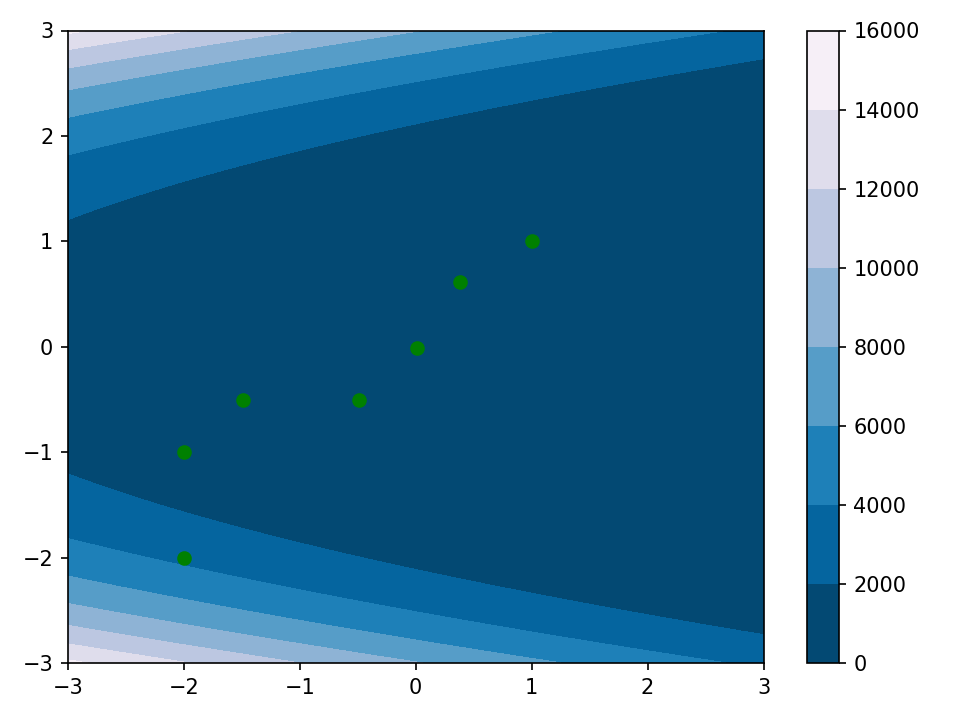

In [7]:
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, z, cmap=cm.PuBu_r)
ax.scatter(x_list_1,y_list_1,c='green')
cbar = fig.colorbar(cs)
plt.show()

Second run of local minima search with diminishing steplength

In [8]:
omega_k = (-2,-2)
value = g(omega_k)

x_list_2 = [omega_k[0]]
y_list_2 = [omega_k[1]]
z_list_2 = [value]
index_2 = [0]
all_values_2 = [value]

for i in range(K):
    for j in range(P):
        random_dir = np.random.randn(2,1)
        normalized_denom = math.sqrt(random_dir[0]**2+random_dir[1]**2)
        x_dir = (random_dir[0]/normalized_denom)**2
        y_dir = (random_dir[1]/normalized_denom)**2
        if (j==0):
            random_point = (omega_k[0]+x_dir*alpha,omega_k[1]+y_dir*alpha)
            best_point =  random_point
            random_value = g(random_point)
        else:
            random_point = (omega_k[0]+x_dir*(1/(i+1)),omega_k[1]+y_dir*(1/(i+1)))
            if(g(random_point)<random_value):
                random_value = g(random_point)
                best_point = random_point
                
    if(random_value<value):
        value = random_value
        omega_k = best_point
        x_list_2.append(omega_k[0])
        y_list_2.append(omega_k[1])
        z_list_2.append(value)
        print("step:"+str(i+1)+' : evaluation ='+str(value[0]))
    else:
        print("step:"+str(i+1)+' : evaluation ='+str(value[0]))
        break
    all_values_2.append(value)
    index_2.append(i)

step:1 : evaluation =909.000045121259
step:2 : evaluation =335.56390025160783
step:3 : evaluation =60.08707263435568
step:4 : evaluation =20.389362252705098
step:5 : evaluation =6.633152801852399
step:6 : evaluation =1.3418676808868608
step:7 : evaluation =0.7405949059820627
step:8 : evaluation =0.6477487706452197
step:9 : evaluation =0.5643568690244402
step:10 : evaluation =0.49040879184888164
step:11 : evaluation =0.4252094243844174
step:12 : evaluation =0.36773815656266956
step:13 : evaluation =0.3171877501919108
step:14 : evaluation =0.2726980299132167
step:15 : evaluation =0.2335406505526446
step:16 : evaluation =0.19908371803515973
step:17 : evaluation =0.1687799444585187
step:18 : evaluation =0.14215969460260752
step:19 : evaluation =0.11881515862991308
step:20 : evaluation =0.09839585059890993
step:21 : evaluation =0.08059564257232632
step:22 : evaluation =0.06514862167500739
step:23 : evaluation =0.051823062221838974
step:24 : evaluation =0.0404116998759713
step:25 : evaluatio

Plotting descent on contour map

<IPython.core.display.Javascript object>


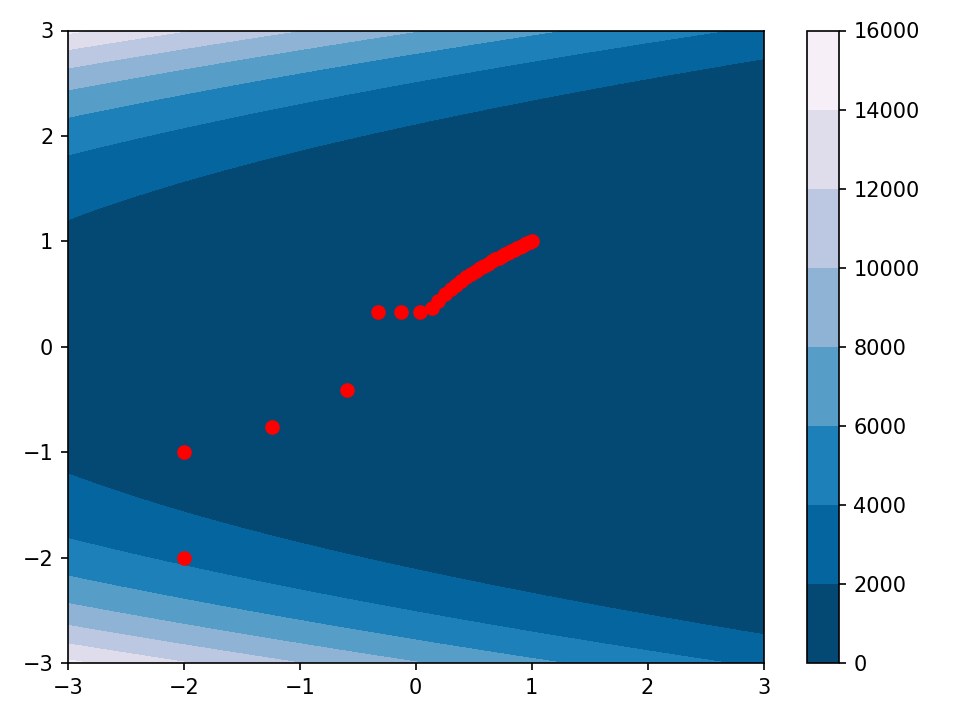

In [9]:
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, z, cmap=cm.PuBu_r)
ax.scatter(x_list_2,y_list_2,c='red')
cbar = fig.colorbar(cs)
plt.show()

Plotting both on the same contour plot
Here the fixed step length algorithm is plotted in green and the diminishing steplengthalgorithm is plotted in red

<IPython.core.display.Javascript object>


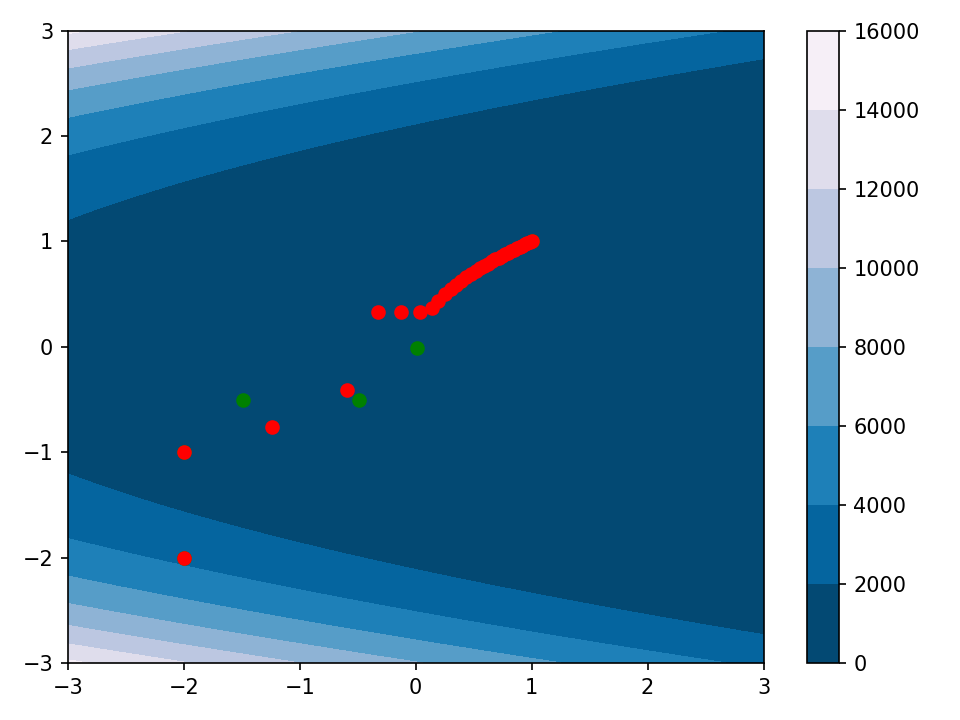

In [10]:
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, z, cmap=cm.PuBu_r)
ax.scatter(x_list_1,y_list_1,c='green')
ax.scatter(x_list_2,y_list_2,c='red')
cbar = fig.colorbar(cs)
plt.show()

This may be hard to see if plots overlap 

Here is the cost function history plot for both algorithms

<IPython.core.display.Javascript object>


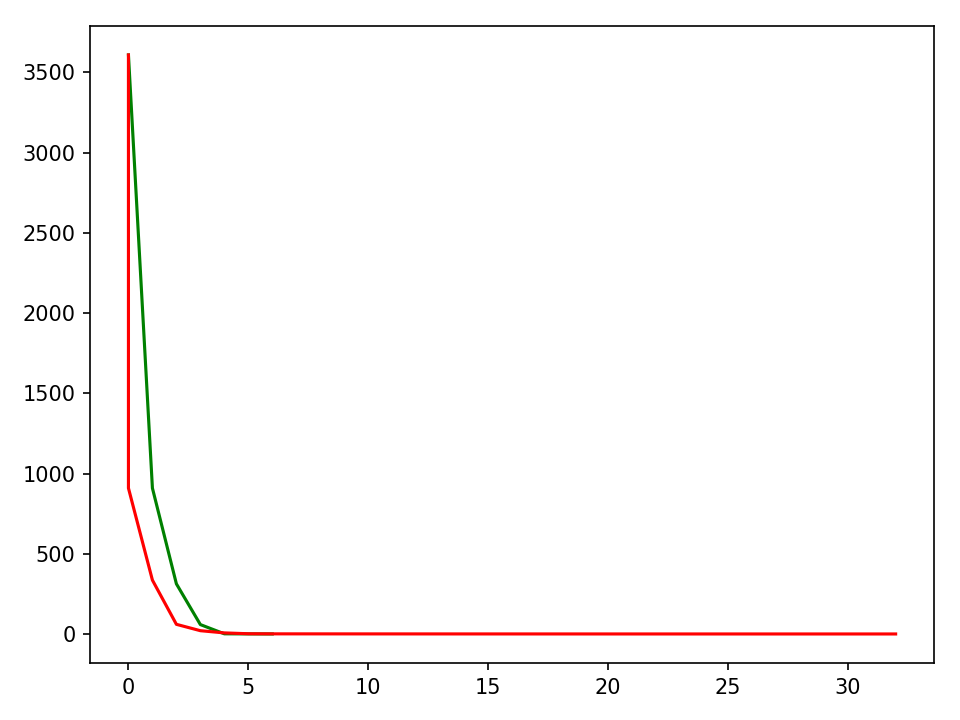

In [11]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(index_1,all_values_1, c='green') 
ax.plot(index_2,all_values_2, c='red') 